# Programación Lineal 1

In [1]:
#!pip install pulp

Programación Lineal (LP en ingles), es una técnica de programación matemática la cual busca obtener el mejor resultado posible, la máxima ganancia, o el menor costo de un modelo matemático. Dicho modelo cuenta con requerimientos que deben de satisfacerse. Dichos requerimientos están representados en la forma de ecuaciones/desigualdades lineales.

$$Z_{max}=300x+100y$$

$$40x+8y \le 800 $$

$$10x+5y \le 320$$

$$y \le 60$$

$$x,y \ge 0$$

In [2]:
# Importamos la libreria pulp para LP

import pulp as p

In [3]:
# Se crea un problema de minimización, para ello se crea un objeto
# mediante la instanciación de la clase LpProblem. El primer argumento
# Corresponde al título del ejercicio, mientras que el segundo define
# el tipo de problema a resolver:

prob = p.LpProblem('Problema', p.LpMaximize)

In [4]:
# De forma similar, se crean objetos para las variables, desde la
# clase LpVariable:

x = p.LpVariable("x", lowBound = 0)   # Create a variable x >= 0 
y = p.LpVariable("y", lowBound = 0)   # Create a variable y >= 0 

In [5]:
# Función objetivo:

prob += 300 * x + 100 * y  

In [6]:
# Restricciones: 

prob += 40 * x + 8 * y <= 800
prob += 10*x + 5*y <= 320
prob += y <= 60

In [7]:
# Se muestra los datos del ejercicio:

print(prob) 

Problema:
MAXIMIZE
300*x + 100*y + 0
SUBJECT TO
_C1: 40 x + 8 y <= 800

_C2: 10 x + 5 y <= 320

_C3: y <= 60

VARIABLES
x Continuous
y Continuous



In [8]:
status = prob.solve()   # Ejecutamos el solver 
print(p.LpStatus[status])   # Revisamos el estado de la solución

Optimal


In [9]:
# Se imprimen los resultados finales del ejercicio:

print(p.value(x), p.value(y), p.value(prob.objective))

12.0 40.0 7600.0


$$Z_{max}=300x+100y$$

$$40x+8y \le 800 $$

$$10x+5y \le 320$$

$$y \le 60$$

$$x,y \ge 0$$

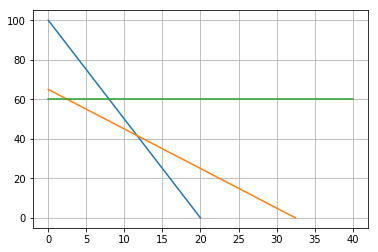

In [36]:
import matplotlib.pyplot as plt
#Desigualdad 1
point1 = [0, 100] ; point2 = [20, 0]
x_values1 = [point1[0], point2[0]] ; y_values1 = [point1[1], point2[1]]

#Desigualdad 2
point3 = [0, 65] ; point4 = [32.5, 0]
x_values2 = [point3[0], point4[0]] ; y_values2 = [point3[1], point4[1]]

#Desigualdad 3
point5 = [0, 60] ; point6 = [40, 60]
x_values3 = [point5[0], point6[0]] ; y_values3 = [point5[1], point6[1]]

plt.plot(x_values1, y_values1)
plt.plot(x_values2, y_values2)
plt.plot(x_values3, y_values3)
plt.grid(True)
plt.show()

# Whiskas

In [11]:
import pulp as p

In [12]:
#Versión simplificada del problema de Whiskas utilizando PuLP Modeller en Python

#Authors original version: Antony Phillips, Dr Stuart Mitchell  2007
#Autor Version español: Dr Edgar Avalos 2020

<img src="img/whiskas.jpg" width=400>

El alimento para gato "Whiskas" es manufacturado por "Uncle's Ben". Se quiere producir alimento que satisfaga la normativa nutricional vigente al menor costo posible. Para cada **100 gramos de alimento**, los ingredientes son **pollo, res, cordero, arroz, avena y vitaminas adicionadas en gel**. Los costos de los carnicos son **0.013, 0.008, 0.010 usd** respectivamente. Para los otros ingredientes sus costos son **0.002, 0.005 y 0.001 usd** respectivamente. Todos los costos son por gramos. El aporte de cada ingrediente al alimento es el siguiente:

<table>
  <tr>
    <th>Ingrediente</th>
    <th>Proteina</th>
    <th>Grasa</th>
    <th>Fibra</th>
    <th>Sal</th>
  </tr>
  <tr>
    <td><b>Pollo</b></td>
    <td>0.100</td>
    <td>0.080</td>
    <td>0.001</td>
    <td>0.002</td>
  </tr>
  <tr>
    <td><b>Res</b></td>
    <td>0.200</td>
    <td>0.100</td>
    <td>0.005</td>
    <td>0.005</td>
  </tr>
  <tr>
    <td><b>Cordero</b></td>
    <td>0.150</td>
    <td>0.110</td>
    <td>0.003</td>
    <td>0.007</td>
  </tr>
    <tr>
    <td><b>Arroz</b></td>
    <td>0.000</td>
    <td>0.010</td>
    <td>0.100</td>
    <td>0.008</td>
  </tr>
  <tr>
    <td><b>Avena</b></td>
    <td>0.040</td>
    <td>0.010</td>
    <td>0.150</td>
    <td>0.008</td>
  </tr>
  <tr>
    <td><b>Gel</b></td>
    <td>0.000</td>
    <td>0.000</td>
    <td>0.000</td>
    <td>0.000</td>
  </tr>
</table>

De acuerdo a la normativa, los aportes de proteina, grasa, fibra y sal de los alimentos para gato deben ser por lo menos de **8.0, 6.0, 2.0 y 0.4** respectivamente.**_¿Qué cantidad de cada ingrediente se debe incluir en el alimento para minimizar el costo?_**

## Solución considerando solamente pollo y res

Primero se resolvera una versión simplificada del problema, en la que solo se considerarán 2 ingredientes.

**Función objetivo:**

$$Z_{min}=0.013x_1+0.008x_2$$

**Variables de decisión:**

$x_1:$% carne de pollo en cada lata de alimento para gato

$x_2:$% carne de res en cada lata de alimento para gato

**Restricciones:**

$$x_1+x_2=100$$


$$0.1x_1+0.2x_2 \ge 8.0$$

$$0.08x_1+0.1x_2 \ge 6.0$$

$$0.001x_1+0.005x_2 \le 2.0$$

$$0.002x_1+0.005x_2 \le 0.4$$

In [13]:
# Se crea el objeto 'prob' para contener los datos del problema
# para ello hacemos una instancia desde la clase LpProblem:

prob = p.LpProblem("El_problema_Whiskas",p.LpMinimize)

In [14]:
print(prob)

El_problema_Whiskas:
MINIMIZE
None
VARIABLES



In [15]:
# De una manera similar, creamos los objetos para contener a las variables.
# Para ello, se instanciará desde la clase LpVariable:
#
#           LpVariable("Nombre_variable",[lim_inferior, lim_superior, tipo de variable])


x1=p.LpVariable("%_Pollo",0,None,p.LpInteger)
x2=p.LpVariable("%_Res",0)

In [16]:
x1,x2

(%_Pollo, %_Res)

**Agregando la Función objetivo al modelo:**

In [17]:
# Para agregar la función, es necesario utilizar +=

prob += 0.013*x1 + 0.008*x2, "Total Cost of Ingredients per can"

El último paso en la programación de este modelo, es agregar las restricciones al objeto **prob**:

In [18]:
# Se agregan las 5 restricciones, similar a la función objetivo

prob += x1 + x2 == 100, "Suma_de_porcentajes"
prob += 0.100*x1 + 0.200*x2 >= 8.0, "Requerimiento_de_proteina"
prob += 0.080*x1 + 0.100*x2 >= 6.0, "Requerimiento_de_grasa"
prob += 0.001*x1 + 0.005*x2 <= 2.0, "Requerimiento_de_fibra"
prob += 0.002*x1 + 0.005*x2 <= 0.4, "Requerimiento_de_sal"

In [19]:
# Se ejecuta el solver
prob.solve()

1

In [20]:
# Imprimimos el status de la solución obtenida:
print("Status:", p.LpStatus[prob.status])

Status: Optimal


In [21]:
# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

%_Pollo = 34.0
%_Res = 66.0


In [22]:
objetivo=p.value(prob.objective)

In [23]:
# The optimised objective function value is printed to the screen
print("Total Cost of Ingredients per can = ", objetivo,"usd")

Total Cost of Ingredients per can =  0.97 usd


## Solución considerando todos los ingredientes:

Primero se resolvera una versión simplificada del problema, en la que solo se considerarán 2 ingredientes.

**Función objetivo:**

$$Z_{min}=0.013x_1+0.008x_2+0.010x_3+0.002x_4+0.005x_5+0.001x_6$$

**Variables de decisión:**

$x_1:$% carne de pollo en cada lata de alimento para gato

$x_2:$% carne de res en cada lata de alimento para gato

$x_3:$% carne de cordero en cada lata de alimento para gato

$x_4:$% de arroz en cada lata de alimento para gato

$x_5:$% de avena en cada lata de alimento para gato

$x_6:$% de gel en cada lata de alimento para gato

**Restricciones:**

$$x_1+x_2+x_3+x_4+x_5+x_6=100$$


$$0.100x_1+0.200x_2+0.150x_3+0.000x_4+0.040x_5+0.000x_6 \ge 8.0$$

$$0.080x_1+0.100x_2+0.110x_3+0.010x_4+0.010x_5+0.000x_6 \ge 6.0$$

$$0.001x_1+0.005x_2+0.003x_3+0.100x_4+0.150x_5+0.000x_6 \le 2.0$$

$$0.002x_1+0.005x_2+0.007x_3+0.002x_4+0.008x_5+0.000x_6 \le 0.4$$

In [24]:
import pulp as p

In [25]:
# Por tener un mayor número de variables y restricciones, será necesario
# crear una lista que contenga el nombre de las variables, y diccionarios
# para relacionar dichas variables a sus correspondientes valores de 
# restricción:

# Lista
Ingredientes = ['Pollo', 'Res', 'Cordero', 'Arroz', 'Avena', 'Gel']

# Diccionarios
costos = {'Pollo': 0.013, 
         'Res': 0.008, 
         'Cordero': 0.010, 
         'Arroz': 0.002, 
         'Avena': 0.005, 
         'Gel': 0.001}


Porcentaje_proteina = {'Pollo': 0.100, 
                      'Res': 0.200, 
                      'Cordero': 0.150, 
                      'Arroz': 0.000, 
                      'Avena': 0.040, 
                      'Gel': 0.000}


Porcentaje_grasa = {'Pollo': 0.080, 
                  'Res': 0.100, 
                  'Cordero': 0.110, 
                  'Arroz': 0.010, 
                  'Avena': 0.010, 
                  'Gel': 0.000}


Porcentaje_fibra = {'Pollo': 0.001, 
                    'Res': 0.005, 
                    'Cordero': 0.003, 
                    'Arroz': 0.100, 
                    'Avena': 0.150, 
                    'Gel': 0.000}


Porcentaje_sal = {'Pollo': 0.002, 
                   'Res': 0.005, 
                   'Cordero': 0.007, 
                   'Arroz': 0.002, 
                   'Avena': 0.008, 
                   'Gel': 0.000}

In [26]:
prob = p.LpProblem("Problema_Whiskas_2", p.LpMinimize)

In [27]:
# A partir de la lista de variables, usaremos la clase LpVariable.dicts
# para generar un diccionario especial:

ingredient_vars = p.LpVariable.dicts("Ingr",Ingredientes,0)

In [28]:
ingredient_vars

{'Pollo': Ingr_Pollo,
 'Res': Ingr_Res,
 'Cordero': Ingr_Cordero,
 'Arroz': Ingr_Arroz,
 'Avena': Ingr_Avena,
 'Gel': Ingr_Gel}

Los **diccionarios** serán utilizados para poder agregar la función a optimizar, y las restricciones, de una forma mas eficiente:

In [29]:
# Función objetivo
prob += p.lpSum([costos[i]*ingredient_vars[i] for i in Ingredientes])

In [30]:
# Restricciones
prob += p.lpSum([ingredient_vars[i] for i in Ingredientes]) == 100, "Suma_porcentaje"
prob += p.lpSum([Porcentaje_proteina[i] * ingredient_vars[i] for i in Ingredientes]) >= 8.0, "Requerimiento_proteina"
prob += p.lpSum([Porcentaje_grasa[i] * ingredient_vars[i] for i in Ingredientes]) >= 6.0, "Requerimiento_grasa"
prob += p.lpSum([Porcentaje_fibra[i] * ingredient_vars[i] for i in Ingredientes]) <= 2.0, "Requerimiento_fibra"
prob += p.lpSum([Porcentaje_sal[i] * ingredient_vars[i] for i in Ingredientes]) <= 0.4, "Requerimiento_sal"

In [31]:
prob.solve()
print("Status:", p.LpStatus[prob.status])

Status: Optimal


In [32]:
for v in prob.variables():
    print(v.name, "=", v.varValue)

Ingr_Arroz = 0.0
Ingr_Avena = 0.0
Ingr_Cordero = 0.0
Ingr_Gel = 40.0
Ingr_Pollo = 0.0
Ingr_Res = 60.0


In [33]:
objetivo=p.value(prob.objective)
print("Total Cost of Ingredients per can = ", objetivo,"usd")

Total Cost of Ingredients per can =  0.52 usd


## Actividad

Un barco tiene 3 bodegas: en la proa, en el centro y en la popa. Los límites de capacidad son:

<img src="img/barco1.jpg" width=400>

Se ofrecen los siguientes cargamentos y los dueños de los barcos pueden aceptar el total o una porción cualquiera de cada artículo:

<img src="img/barco2.jpg" width=400>

Para presercar el equilibro del barco, el peso en cada bodega debe ser proporcional a la capcidad en toneladas. ¿Cómo debe distribuirse la carga para hacer máxima la ganancia?